<a href="https://colab.research.google.com/github/manikanta-52/FMML_COURSE_ASSIGNMENT/blob/main/FMML_Aug'22_M9_L1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundation of Modern Machine Learning
## Module 9: Neural Networks
## Lab 1: Introduction to Multi-Layer Perceptron (MLP)
#### Module Coordinator: Shantanu Agrawal




# Exercise

Recall the single layer perceptron you had seen earlier. Remember when you were trying to find decision boundaries for AND, OR, NAND, NOR, XOR? For which of these could the SLP succesfully classify? Can you notice anything about the data in this case?

Look for *Module 4* notebooks for the revison to these texts.

Let us revise SLP briefly.



# Single Layer Perceptron


A perceptron or a neuron is a mathematical function that takes in input a vector and outputs a single numerical value.

The neuron is defined as follows:
$$
y = f \left( \sum_i (x_i w_i + b) \right)
$$



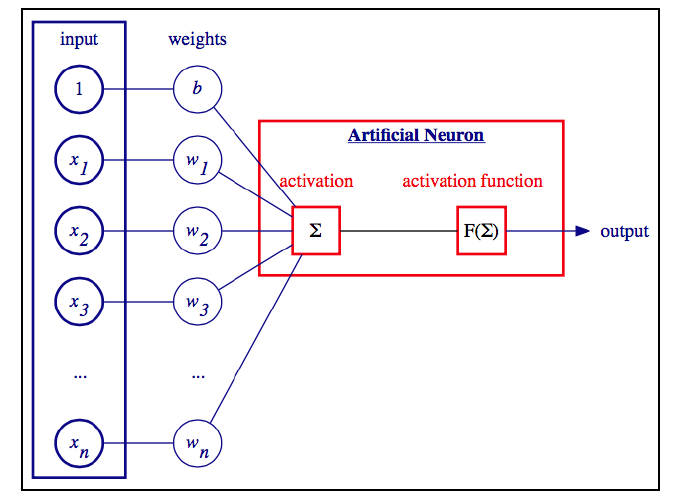

# Linearly separable data

If you recall, the perceptron was able to classify for the rest of the logic gates, but not XOR. What exactly makes XOR a problem that the perceptron is unable to tackle?
Hint: Try plotting the XOR function on a graph.

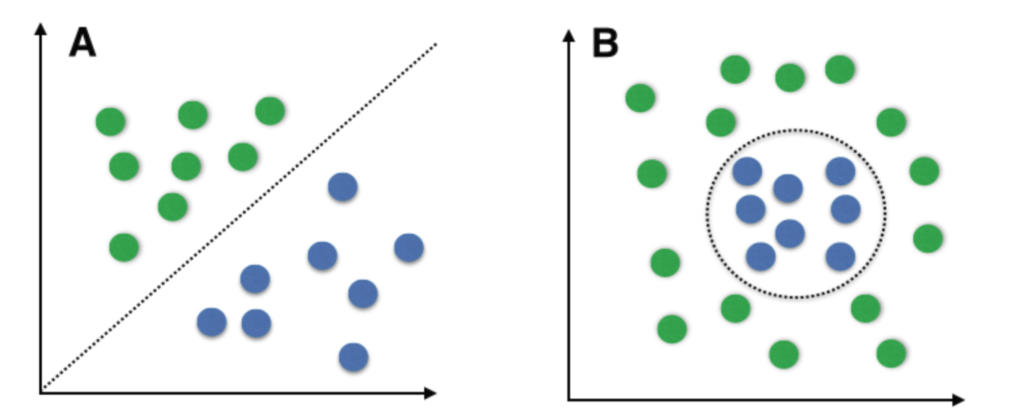

The answer relates to *linear separability* of the data.

# Limitations of linear models

Linear models may tend to go wrong at times and may not be good for the dataset we are dealing with. For example, they tend to encode a simple weaker assumption of *monotonicity*, ie, that increase in our feature must either always cause an increase in our model’s output (if the corresponding weight is positive), or always cause a decrease in our model’s output (if the corresponding weight is negative).
This assumption may not be good assumption at all times, and hence there is an inherent limitation in the power of these models to capture more complex relationships.

Our SLP, for example, cannot classify properly when we do not have linear separability of data.

# Introducing MLPs

We will now use several of the SLP neurons in a layer and stack several layers to create a multi-layered neural network. We see how this network is able to create a decision boundary for XOR, which our SLP could not.

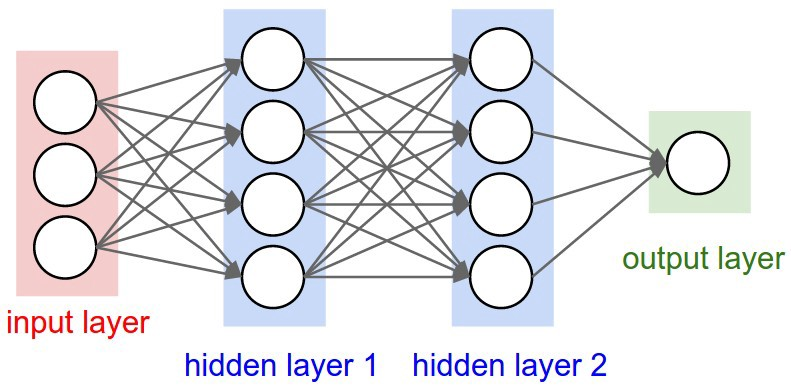

# Hidden Layers

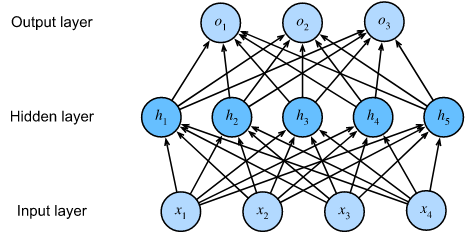

A more general class of functions than linear models can be handled by incorporating one or more hidden layers. We can do this by stacking many fully-connected layers on top of each other. Each layer feeds into the layer above it, until we generate outputs.

One way to think of this architecture is to think of it as the first $L - 1$ layers as creating a transformed representation of the data and the final layer as a linear predictor on this transformed representation.

# Stacking layers without non-linearities

Consider the diagram above.

By the matrix $\mathbf{X} \in \mathbb{R}^{n \times d}$, we denote a minibatch of n examples where each example has d inputs (features). For a one-hidden-layer MLP whose hidden layer has h hidden units, denote by $\mathbf{H} \in \mathbb{R}^{n \times h}$ the outputs of the hidden layer, which are hidden representations. Since the hidden and output layers are both fully connected, we have hidden-layer weights $\mathbf{W}^{(1)} \in \mathbb{R}^{d \times h}$ and biases $\mathbf{b}^{(1)} \in \mathbb{R}^{1 \times h}$ and output-layer weights $\mathbf{W}^{(2)} \in \mathbb{R}^{h \times q}$ and biases $\mathbf{b}^{(2)} \in \mathbb{R}^{1 \times q}$. Formally, we calculate the outputs $\mathbf{O} \in \mathbb{R}^{n \times q}$ of the one-hidden-layer MLP as follows:
\begin{split}\begin{aligned}
    \mathbf{H} & = \mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)}, \\
    \mathbf{O} & = \mathbf{H}\mathbf{W}^{(2)} + \mathbf{b}^{(2)}.
\end{aligned}\end{split}

Note that after adding the hidden layer, our model now requires us to track and update additional sets of parameters. What advantage has this given us?

It might surprise you to find that there isn't really any advantage in terms of the expressiblity: our model is still ultimately linear.


We can view the equivalence formally by proving that for any values of the weights, we can just collapse out the hidden layer, yielding an equivalent single-layer model with parameters $\mathbf{W} = \mathbf{W}^{(1)}\mathbf{W}^{(2)}$ and $\mathbf{b} = \mathbf{b}^{(1)} \mathbf{W}^{(2)} + \mathbf{b}^{(2)}$:
$
\mathbf{O} = (\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)})\mathbf{W}^{(2)} + \mathbf{b}^{(2)} = \mathbf{X} \mathbf{W}^{(1)}\mathbf{W}^{(2)} + \mathbf{b}^{(1)} \mathbf{W}^{(2)} + \mathbf{b}^{(2)} = \mathbf{X} \mathbf{W} + \mathbf{b}.
$


# Introducing non-linearities

In order to realize the full potential of MLP, we need a key ingredient: a nonlinear activation function $\sigma$ to be applied to each hidden unit following the affine transformation. The outputs of activation functions (e.g., $\sigma(\cdot)$) are called activations. In general, with activation functions in place, it is no longer possible to collapse our MLP into a linear model:

$
\begin{split}\begin{aligned}
    \mathbf{H} & = \sigma(\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)}), \\
    \mathbf{O} & = \mathbf{H}\mathbf{W}^{(2)} + \mathbf{b}^{(2)}.\\
\end{aligned}\end{split}
$

Since each row in $\mathbf{X}$ corresponds to an example, with some abuse of notation, we define the nonlinearity $\sigma$ to apply to its inputs in a rowwise fashion, i.e., one example at a time.  

Often, the activation functions that we apply to hidden layers are not merely rowwise, but elementwise. That means that after computing the linear portion of the layer, we can calculate each activation without looking at the values taken by the other hidden units. This is true for most activation functions we look at

To build more general MLPs, we can continue stacking such hidden layers, e.g., $ \mathbf{H}^{(1)} = \sigma_1(\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)})$ and $\mathbf{H}^{(2)} = \sigma_2(\mathbf{H}^{(1)} \mathbf{W}^{(2)} + \mathbf{b}^{(2)})$, one atop another, yielding ever more expressive models.

# Activation functions

Let us take a look at a few of the activation functions we can use with MLPs.

## ReLU

$ \operatorname{ReLU}(x) = \max(x, 0) $

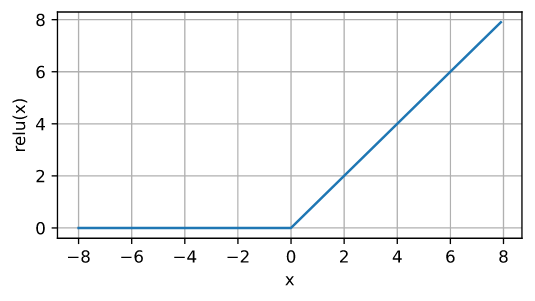

## Sigmoid

$ \operatorname{sigmoid}(x) = \frac{1}{1 + \exp(-x)} $

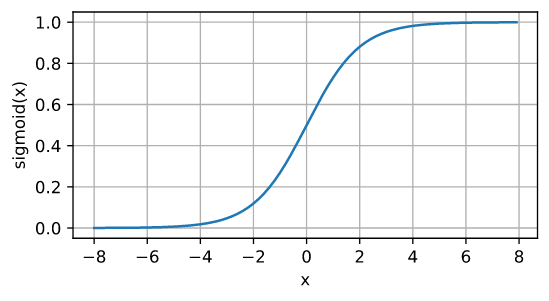

## tanh

$ \operatorname{tanh}(x) = \frac{1 - \exp(-2x)}{1 + \exp(-2x)} $

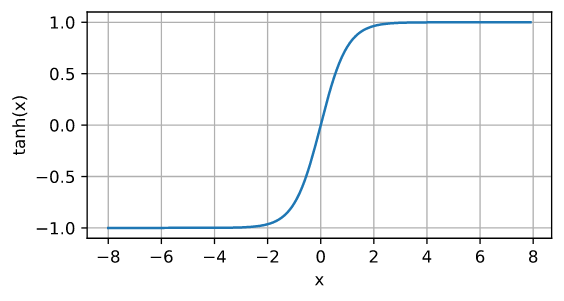

# Example MLP implementation in PyTorch

We now implement an MLP using pytorch and see how it can successfully find a decision boundary for the XOR problem, that our SLP could not solve earlier.

# Required imports

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

%matplotlib inline

# # The following code is used for hiding the warnings and make this notebook clearer.
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

# Plotting code

In [2]:
## Code to plot decision boundary ##

def plot_decision_regions(X, y, classifier, method, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    if method == 'numpy':
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    elif method == 'pytorch':
        inp = torch.tensor([xx1.ravel(), xx2.ravel()], dtype=torch.float, requires_grad=False).T
        Z = np.array([]).reshape(0,1)
        for data in inp:
            out = classifier(data)
            Z = np.vstack((Z, out.data.numpy()))
    else:
        print('Not implemented')
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

# Define the input data

In [3]:
torch.manual_seed(0)

X = torch.tensor([[0,0],[0,1], [1,0], [1,1]], dtype=torch.float, requires_grad=False)
Y = torch.tensor([0,1,1,0], dtype=torch.float, requires_grad=False)


Define the Neural Network class `Net`

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Initialize all the layers with learnable parameters
        self.fc1 = nn.Linear(2, 2, bias=True) 
        self.fc2 = nn.Linear(2, 1, bias=True)

    def forward(self, x):
        # Write the forward pass
        # Note that we use a sigmoid activation function here
        x = self.fc1(x)
        x = torch.sigmoid(x)
        x = self.fc2(x)
        x = torch.sigmoid(x)
        return x

model = Net()

# Initialize the weights

In [5]:
def weights_init(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            # initialize the weight tensor, here we use a normal distribution
            m.weight.data.normal_(0, 1)

weights_init(model)


# Define the loss function

In [6]:
# Use a mean square error loss
loss_func = nn.MSELoss()

# Define optimizer

In [7]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Write the training routine

In [8]:
epochs = 5000
steps = X.size(0)
for i in range(epochs): # iterate over epoch
    for j in range(steps): # iterate over sample
        # randomly sample the inputs
        sample = np.random.randint(X.size(0))
        x_var = X[sample]
        y_var = Y[sample]
        
        optimizer.zero_grad()

        y_hat = model(x_var)
        
        loss = loss_func.forward(y_hat[0], y_var)


        # BACKPROP! You will see more details about this next week!
        loss.backward()
        
        optimizer.step()
        
    if i % 500 == 0:
        print("Epoch: {0}, Loss: {1}, ".format(i, loss.data.numpy()))

Epoch: 0, Loss: 0.2555920481681824, 
Epoch: 500, Loss: 0.21859578788280487, 
Epoch: 1000, Loss: 0.26743024587631226, 
Epoch: 1500, Loss: 0.30684298276901245, 
Epoch: 2000, Loss: 0.3552708625793457, 
Epoch: 2500, Loss: 0.25824978947639465, 
Epoch: 3000, Loss: 0.2538146674633026, 
Epoch: 3500, Loss: 0.24274633824825287, 
Epoch: 4000, Loss: 0.22318845987319946, 
Epoch: 4500, Loss: 0.03931324556469917, 


# Check the output

In [9]:
for data in X:
    output = model(data)
    print(data, np.round(output.data.numpy()))

tensor([0., 0.]) [0.]
tensor([0., 1.]) [1.]
tensor([1., 0.]) [1.]
tensor([1., 1.]) [0.]


# Visualize the decision boundary

<ipython-input-2-d74ee9bebb86>:18: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  inp = torch.tensor([xx1.ravel(), xx2.ravel()], dtype=torch.float, requires_grad=False).T
<ipython-input-2-d74ee9bebb86>:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


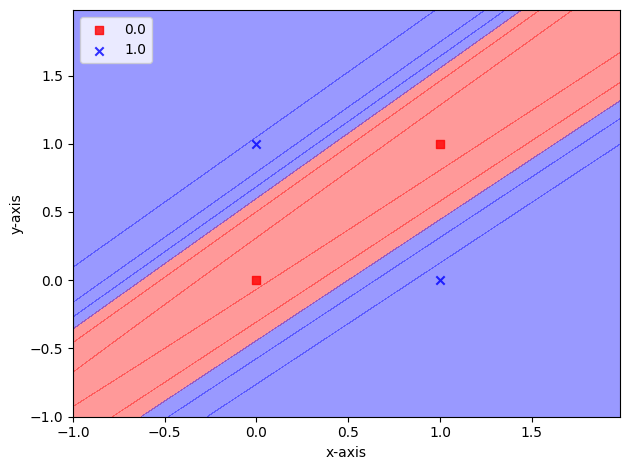

In [10]:
np.random.seed(0)
plot_decision_regions(X.detach().numpy(), Y.detach().numpy(), model, 'pytorch')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Exercises

1.  Try using the MLP classifier for different logic gates other than XOR like AND, OR, NOR etc.
2.  Try to change 0/1 logic to -1/+1 logic. What happens with an SLP in this case? What about an MLP?
3. Try removing the activation function from the MLP and rerun the code. What happens in this case?
  - Can you tell why particular activation function can be used in the model architecture?



SOLUTIONS:

SOLUTION FOR QUESTION 1:

In [11]:
def train_and_visualize(X, y):
  model = Net()
  weights_init(model)
  loss_func = nn.MSELoss()
  optimizer = optim.SGD(model.parameters(), lr=0.1)

  epochs = 5000
  steps = X.size(0)
  for i in range(epochs): # iterate over epoch
      for j in range(steps): # iterate over sample
          # randomly sample the inputs
          sample = np.random.randint(X.size(0))
          x_var = X[sample]
          y_var = y[sample]
          
          optimizer.zero_grad()

          y_hat = model(x_var)
          
          loss = loss_func.forward(y_hat[0], y_var)


          # BACKPROP! You will see more details about this next week!
          loss.backward()
          
          optimizer.step()
          
      if i % 500 == 0:
          print("Epoch: {0}, Loss: {1}, ".format(i, loss.data.numpy()))


  # Visualize
  np.random.seed(0)
  plot_decision_regions(X.detach().numpy(), y.detach().numpy(), model, 'pytorch')
  plt.xlabel('x-axis')
  plt.ylabel('y-axis')
  plt.legend(loc='upper left')
  plt.tight_layout()
  plt.show()

AND

=========================== AND Gate ============================
Epoch: 0, Loss: 0.47398462891578674, 
Epoch: 500, Loss: 0.0005626235506497324, 
Epoch: 1000, Loss: 0.01602492667734623, 
Epoch: 1500, Loss: 0.0027647721581161022, 
Epoch: 2000, Loss: 0.0018877482507377863, 
Epoch: 2500, Loss: 0.002754962770268321, 
Epoch: 3000, Loss: 0.0010885102674365044, 
Epoch: 3500, Loss: 2.181191575800767e-06, 
Epoch: 4000, Loss: 0.0012071345699951053, 
Epoch: 4500, Loss: 1.2881098427897086e-06, 


<ipython-input-2-d74ee9bebb86>:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


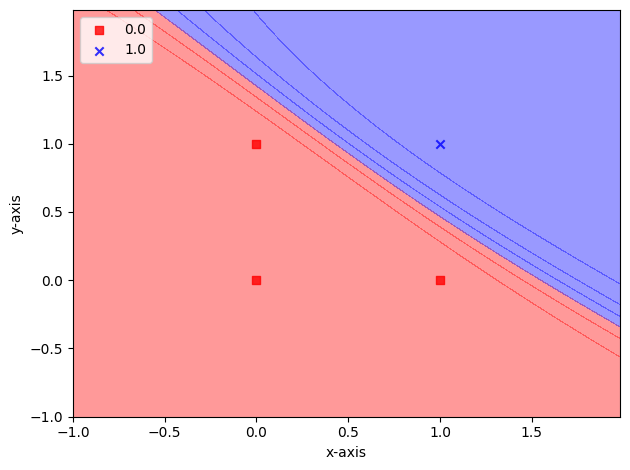

In [13]:
print("=========================== AND Gate ============================")
X = torch.tensor([[0,0],[0,1], [1,0], [1,1]], dtype=torch.float, requires_grad=False)
y = torch.tensor([0,0,0,1], dtype=torch.float, requires_grad=False)
train_and_visualize(X, y)

OR

=========================== OR Gate ============================
Epoch: 0, Loss: 0.23317401111125946, 
Epoch: 500, Loss: 0.07859370112419128, 
Epoch: 1000, Loss: 0.0007495104218833148, 
Epoch: 1500, Loss: 0.00352747761644423, 
Epoch: 2000, Loss: 0.002045901259407401, 
Epoch: 2500, Loss: 0.0013521633809432387, 
Epoch: 3000, Loss: 0.001101169385947287, 
Epoch: 3500, Loss: 0.0016261856071650982, 
Epoch: 4000, Loss: 0.0006827686447650194, 
Epoch: 4500, Loss: 0.0011937797535210848, 


<ipython-input-2-d74ee9bebb86>:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


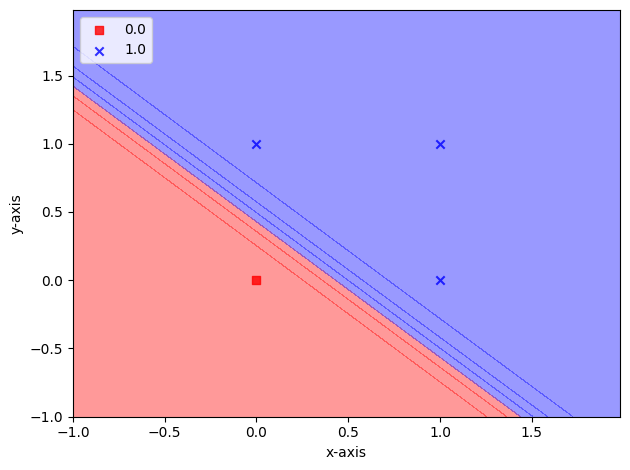

In [14]:
print("=========================== OR Gate ============================")
X = torch.tensor([[0,0],[0,1], [1,0], [1,1]], dtype=torch.float, requires_grad=False)
y = torch.tensor([0,1,1,1], dtype=torch.float, requires_grad=False)
train_and_visualize(X, y)

NOR

=========================== NOR Gate ============================
Epoch: 0, Loss: 0.6130266189575195, 
Epoch: 500, Loss: 0.05631937086582184, 
Epoch: 1000, Loss: 0.0009118748130276799, 
Epoch: 1500, Loss: 0.0033384691923856735, 
Epoch: 2000, Loss: 0.0020323889330029488, 
Epoch: 2500, Loss: 0.0016462591011077166, 
Epoch: 3000, Loss: 0.0011645413469523191, 
Epoch: 3500, Loss: 0.0030998019501566887, 
Epoch: 4000, Loss: 0.0008738194592297077, 
Epoch: 4500, Loss: 0.0023354901932179928, 


<ipython-input-2-d74ee9bebb86>:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


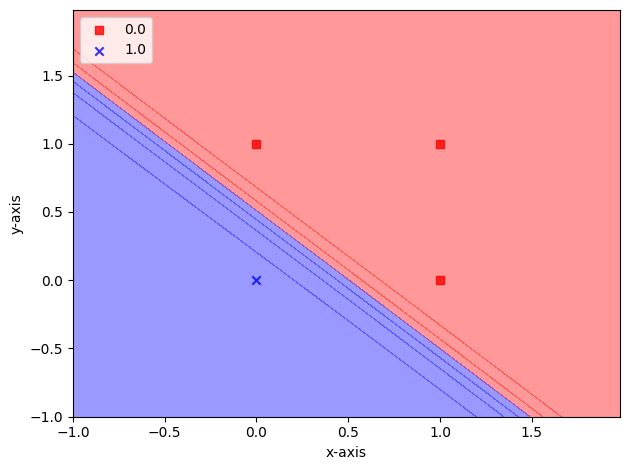

In [15]:
print("=========================== NOR Gate ============================")
X = torch.tensor([[0,0],[0,1], [1,0], [1,1]], dtype=torch.float, requires_grad=False)
y = torch.tensor([1, 0, 0, 0], dtype=torch.float, requires_grad=False)
train_and_visualize(X, y)

NAND

=========================== NAND Gate ============================
Epoch: 0, Loss: 0.07126946747303009, 
Epoch: 500, Loss: 0.0024092807434499264, 
Epoch: 1000, Loss: 0.0350126177072525, 
Epoch: 1500, Loss: 0.004994325805455446, 
Epoch: 2000, Loss: 0.0031269602477550507, 
Epoch: 2500, Loss: 0.0023314247373491526, 
Epoch: 3000, Loss: 0.0016795005649328232, 
Epoch: 3500, Loss: 2.040569142991444e-06, 
Epoch: 4000, Loss: 0.0009298970107920468, 
Epoch: 4500, Loss: 1.2767310408889898e-06, 


<ipython-input-2-d74ee9bebb86>:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


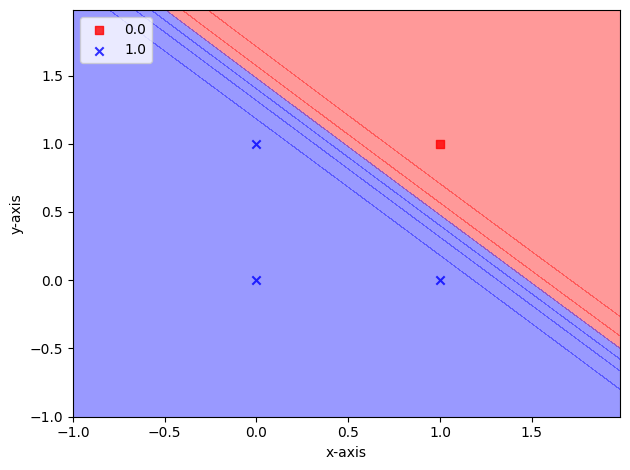

In [16]:
print("=========================== NAND Gate ============================")
X = torch.tensor([[0,0],[0,1], [1,0], [1,1]], dtype=torch.float, requires_grad=False)
y = torch.tensor([1,1,1,0], dtype=torch.float, requires_grad=False)
train_and_visualize(X, y)

For all the gates except XOR, MLP correctly finds the decision boundary

SOLUTION FOR QUESTION 2:

MLP

=========================== XOR Gate ============================
Epoch: 0, Loss: 2.101982355117798, 
Epoch: 500, Loss: 1.0603430271148682, 
Epoch: 1000, Loss: 1.024628758430481, 
Epoch: 1500, Loss: 0.9956892728805542, 
Epoch: 2000, Loss: 0.9970580339431763, 
Epoch: 2500, Loss: 0.006310163997113705, 
Epoch: 3000, Loss: 0.9981926679611206, 
Epoch: 3500, Loss: 1.0020055770874023, 
Epoch: 4000, Loss: 0.0031327158212661743, 
Epoch: 4500, Loss: 1.0015417337417603, 


<ipython-input-2-d74ee9bebb86>:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


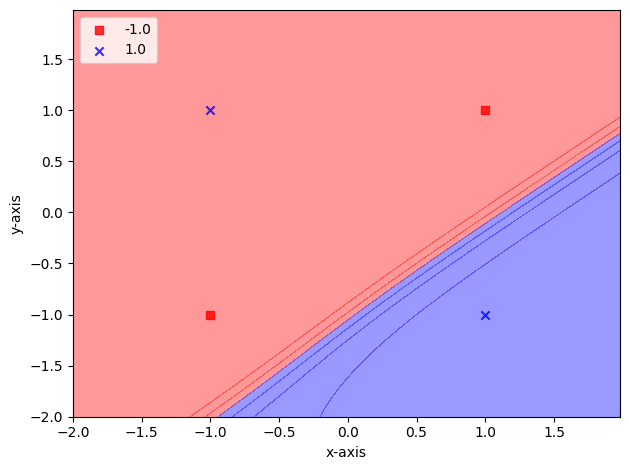

=========================== AND Gate ============================
Epoch: 0, Loss: 1.6464866399765015, 
Epoch: 500, Loss: 1.003710389137268, 
Epoch: 1000, Loss: 0.006562434136867523, 
Epoch: 1500, Loss: 1.003382921218872, 
Epoch: 2000, Loss: 1.0023337602615356, 
Epoch: 2500, Loss: 1.0018845796585083, 
Epoch: 3000, Loss: 1.0014557838439941, 
Epoch: 3500, Loss: 1.0003511905670166, 
Epoch: 4000, Loss: 1.0010573863983154, 
Epoch: 4500, Loss: 1.0002694129943848, 


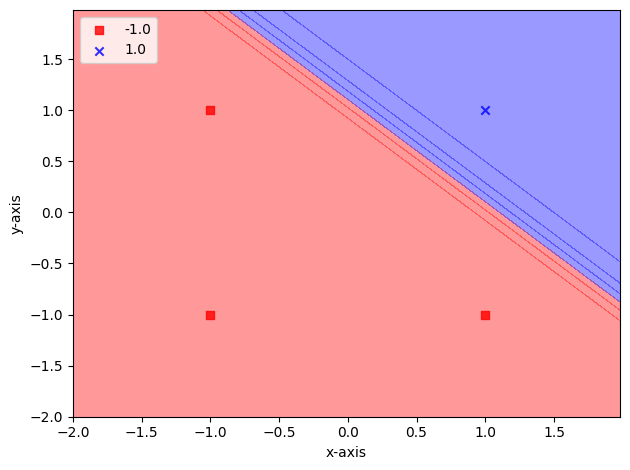

=========================== OR Gate ============================
Epoch: 0, Loss: 2.1997082233428955, 
Epoch: 500, Loss: 1.0508774518966675, 
Epoch: 1000, Loss: 0.00016737545956857502, 
Epoch: 1500, Loss: 0.0017796654719859362, 
Epoch: 2000, Loss: 0.001197771867737174, 
Epoch: 2500, Loss: 0.0009812769712880254, 
Epoch: 3000, Loss: 0.0007299052667804062, 
Epoch: 3500, Loss: 1.0055429935455322, 
Epoch: 4000, Loss: 0.0005286026280373335, 
Epoch: 4500, Loss: 1.0043145418167114, 


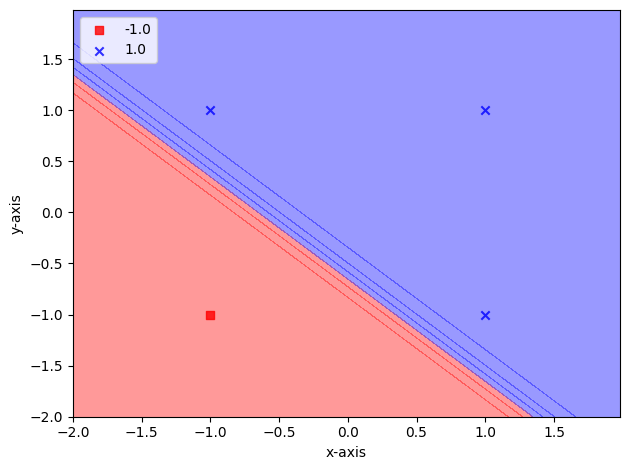

=========================== NOR Gate ============================
Epoch: 0, Loss: 0.43722113966941833, 
Epoch: 500, Loss: 0.050124600529670715, 
Epoch: 1000, Loss: 1.0011190176010132, 
Epoch: 1500, Loss: 1.0035616159439087, 
Epoch: 2000, Loss: 1.0023672580718994, 
Epoch: 2500, Loss: 1.0018614530563354, 
Epoch: 3000, Loss: 1.001406192779541, 
Epoch: 3500, Loss: 0.0023100615944713354, 
Epoch: 4000, Loss: 1.0010154247283936, 
Epoch: 4500, Loss: 0.001767310663126409, 


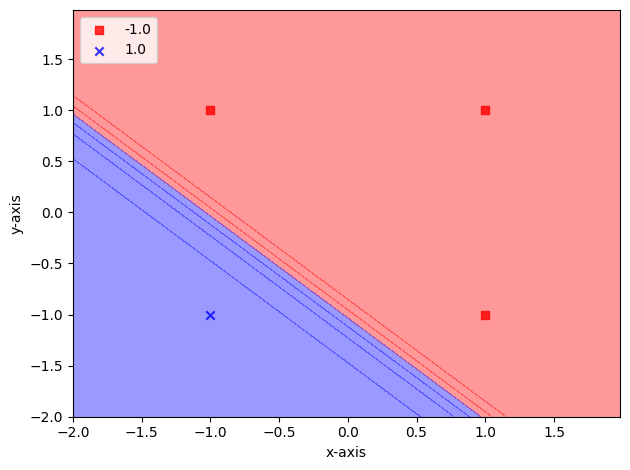

=========================== NAND Gate ============================
Epoch: 0, Loss: 0.05901695042848587, 
Epoch: 500, Loss: 0.00024479671264998615, 
Epoch: 1000, Loss: 1.0109344720840454, 
Epoch: 1500, Loss: 0.0014356037136167288, 
Epoch: 2000, Loss: 0.001011067652143538, 
Epoch: 2500, Loss: 0.0008313574362546206, 
Epoch: 3000, Loss: 0.0006569517427124083, 
Epoch: 3500, Loss: 4.565491690300405e-05, 
Epoch: 4000, Loss: 0.0004726906481664628, 
Epoch: 4500, Loss: 3.550227120285854e-05, 


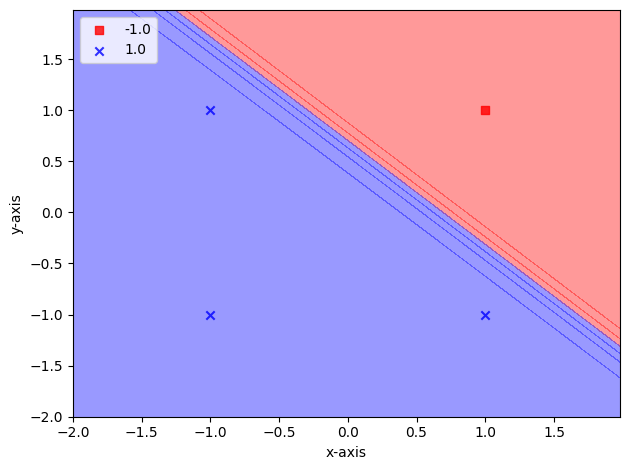

In [17]:
X = torch.tensor([[-1,-1],[-1,1], [1,-1], [1,1]], dtype=torch.float, requires_grad=False)

print("=========================== XOR Gate ============================")
y = torch.tensor([-1,1,1,-1], dtype=torch.float, requires_grad=False)
train_and_visualize(X, y)

print("=========================== AND Gate ============================")
y = torch.tensor([-1,-1,-1,1], dtype=torch.float, requires_grad=False)
train_and_visualize(X, y)

print("=========================== OR Gate ============================")
y = torch.tensor([-1,1,1,1], dtype=torch.float, requires_grad=False)
train_and_visualize(X, y)

print("=========================== NOR Gate ============================")
y = torch.tensor([1,-1,-1,-1], dtype=torch.float, requires_grad=False)
train_and_visualize(X, y)

print("=========================== NAND Gate ============================")
y = torch.tensor([1,1,1,-1], dtype=torch.float, requires_grad=False)
train_and_visualize(X, y)

For all the gates except XOR, MLP correctly finds the decision boundary

SLP

In [19]:
class Net_slp(nn.Module):
    def __init__(self):
        super(Net_slp, self).__init__()
        # Initialize all the layers with learnable parameters
        self.fc2 = nn.Linear(2, 1, bias=True)

    def forward(self, x):
        # Write the forward pass
        # Note that we use a sigmoid activation function here
        x = self.fc2(x)
        x = torch.sigmoid(x)
        return x

In [20]:
def slp_train_and_visualize(X, y):
  model = Net_slp()
  weights_init(model)
  loss_func = nn.MSELoss()
  optimizer = optim.SGD(model.parameters(), lr=0.1)

  epochs = 5000
  steps = X.size(0)
  for i in range(epochs): # iterate over epoch
      for j in range(steps): # iterate over sample
          # randomly sample the inputs
          sample = np.random.randint(X.size(0))
          x_var = X[sample]
          y_var = y[sample]
          
          optimizer.zero_grad()

          y_hat = model(x_var)
          
          loss = loss_func.forward(y_hat[0], y_var)


          # BACKPROP! You will see more details about this next week!
          loss.backward()
          
          optimizer.step()
          
      if i % 500 == 0:
          print("Epoch: {0}, Loss: {1}, ".format(i, loss.data.numpy()))


  # Visualize
  np.random.seed(0)
  plot_decision_regions(X.detach().numpy(), y.detach().numpy(), model, 'pytorch')
  plt.xlabel('x-axis')
  plt.ylabel('y-axis')
  plt.legend(loc='upper left')
  plt.tight_layout()
  plt.show()

=========================== XOR Gate ============================
Epoch: 0, Loss: 3.3843705654144287, 
Epoch: 500, Loss: 1.0184170007705688, 
Epoch: 1000, Loss: 1.0086766481399536, 
Epoch: 1500, Loss: 0.002751877997070551, 
Epoch: 2000, Loss: 0.001975022256374359, 
Epoch: 2500, Loss: 0.9999997615814209, 
Epoch: 3000, Loss: 0.0013241892447695136, 
Epoch: 3500, Loss: 1.0025444030761719, 
Epoch: 4000, Loss: 0.9999998807907104, 
Epoch: 4500, Loss: 1.002002239227295, 


<ipython-input-2-d74ee9bebb86>:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


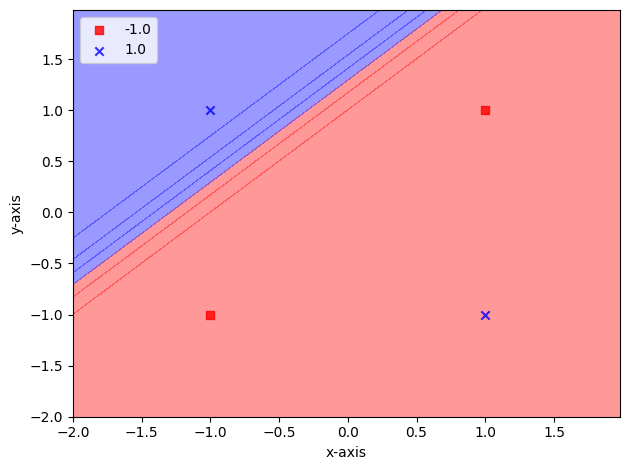

=========================== AND Gate ============================
Epoch: 0, Loss: 2.1002440452575684, 
Epoch: 500, Loss: 1.0000176429748535, 
Epoch: 1000, Loss: 0.004076851066201925, 
Epoch: 1500, Loss: 1.0058586597442627, 
Epoch: 2000, Loss: 1.0042940378189087, 
Epoch: 2500, Loss: 1.003827452659607, 
Epoch: 3000, Loss: 1.0029029846191406, 
Epoch: 3500, Loss: 1.0, 
Epoch: 4000, Loss: 1.002211570739746, 
Epoch: 4500, Loss: 1.0, 


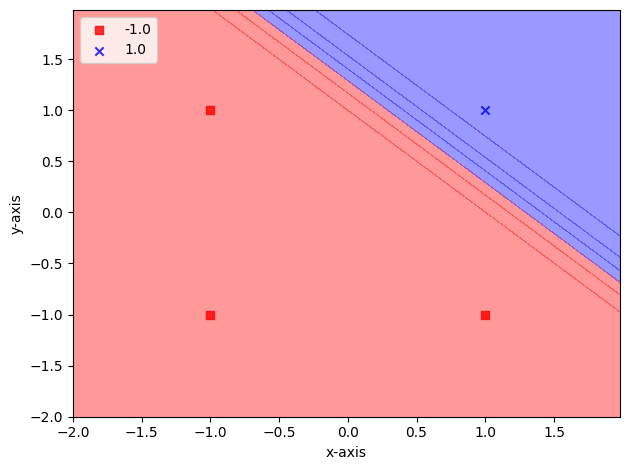

=========================== OR Gate ============================
Epoch: 0, Loss: 1.0726776123046875, 
Epoch: 500, Loss: 1.0158003568649292, 
Epoch: 1000, Loss: 2.865476744773332e-10, 
Epoch: 1500, Loss: 0.002342956606298685, 
Epoch: 2000, Loss: 0.0016803165199235082, 
Epoch: 2500, Loss: 0.0015012201620265841, 
Epoch: 3000, Loss: 0.0011099291732534766, 
Epoch: 3500, Loss: 1.0022099018096924, 
Epoch: 4000, Loss: 0.0008213169639930129, 
Epoch: 4500, Loss: 1.0017516613006592, 


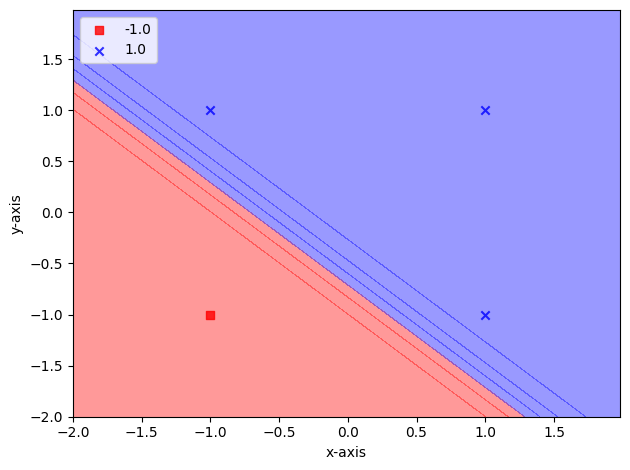

=========================== NOR Gate ============================
Epoch: 0, Loss: 0.02947567030787468, 
Epoch: 500, Loss: 0.008179949596524239, 
Epoch: 1000, Loss: 1.0000028610229492, 
Epoch: 1500, Loss: 1.0059083700180054, 
Epoch: 2000, Loss: 1.0043154954910278, 
Epoch: 2500, Loss: 1.0038132667541504, 
Epoch: 3000, Loss: 1.00287663936615, 
Epoch: 3500, Loss: 0.0011233615223318338, 
Epoch: 4000, Loss: 1.002199411392212, 
Epoch: 4500, Loss: 0.0009020164143294096, 


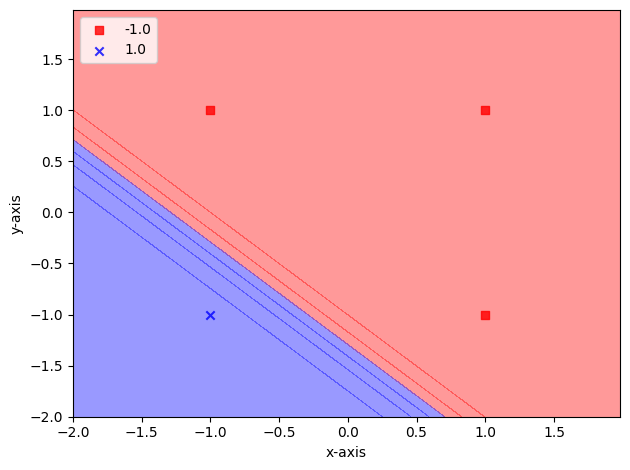

=========================== NAND Gate ============================
Epoch: 0, Loss: 0.5330485105514526, 
Epoch: 500, Loss: 6.7070828890791745e-09, 
Epoch: 1000, Loss: 1.0078933238983154, 
Epoch: 1500, Loss: 0.0023001828230917454, 
Epoch: 2000, Loss: 0.0016500690253451467, 
Epoch: 2500, Loss: 0.0015010122442618012, 
Epoch: 3000, Loss: 0.0011250602547079325, 
Epoch: 3500, Loss: 1.4210854715202004e-12, 
Epoch: 4000, Loss: 0.0008296740707010031, 
Epoch: 4500, Loss: 5.115907697472721e-13, 


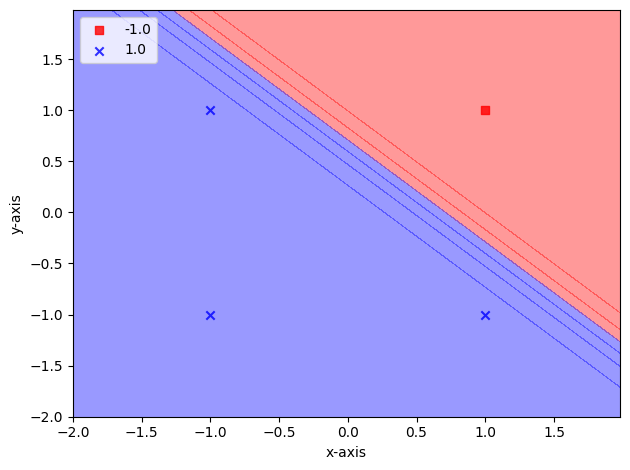

In [21]:
X = torch.tensor([[-1,-1],[-1,1], [1,-1], [1,1]], dtype=torch.float, requires_grad=False)

print("=========================== XOR Gate ============================")
y = torch.tensor([-1,1,1,-1], dtype=torch.float, requires_grad=False)
slp_train_and_visualize(X, y)

print("=========================== AND Gate ============================")
y = torch.tensor([-1,-1,-1,1], dtype=torch.float, requires_grad=False)
slp_train_and_visualize(X, y)

print("=========================== OR Gate ============================")
y = torch.tensor([-1,1,1,1], dtype=torch.float, requires_grad=False)
slp_train_and_visualize(X, y)

print("=========================== NOR Gate ============================")
y = torch.tensor([1,-1,-1,-1], dtype=torch.float, requires_grad=False)
slp_train_and_visualize(X, y)

print("=========================== NAND Gate ============================")
y = torch.tensor([1,1,1,-1], dtype=torch.float, requires_grad=False)
slp_train_and_visualize(X, y)

SOLUTION FOR QUESTION 3:

In [22]:
class Net_linear(nn.Module):
    def __init__(self):
        super(Net_linear, self).__init__()
        # Initialize all the layers with learnable parameters
        self.fc1 = nn.Linear(2, 2, bias=True) 
        self.fc2 = nn.Linear(2, 1, bias=True)

    def forward(self, x):
        # Write the forward pass
        # Note that we REMOVED sigmoid activation function from here
        x = self.fc1(x)
        x = self.fc2(x)
        return x

In [23]:
def linear_train_and_visualize(X, y):
  model = Net_linear()
  weights_init(model)
  loss_func = nn.MSELoss()
  optimizer = optim.SGD(model.parameters(), lr=0.1)

  epochs = 5000
  steps = X.size(0)
  for i in range(epochs): # iterate over epoch
      for j in range(steps): # iterate over sample
          # randomly sample the inputs
          sample = np.random.randint(X.size(0))
          x_var = X[sample]
          y_var = y[sample]
          
          optimizer.zero_grad()

          y_hat = model(x_var)
          
          loss = loss_func.forward(y_hat[0], y_var)


          # BACKPROP! You will see more details about this next week!
          loss.backward()
          
          optimizer.step()
          
      if i % 500 == 0:
          print("Epoch: {0}, Loss: {1}, ".format(i, loss.data.numpy()))


  # Visualize
  np.random.seed(0)
  plot_decision_regions(X.detach().numpy(), y.detach().numpy(), model, 'pytorch')
  plt.xlabel('x-axis')
  plt.ylabel('y-axis')
  plt.legend(loc='upper left')
  plt.tight_layout()
  plt.show()

=========================== XOR Gate ============================
Epoch: 0, Loss: 0.38368090987205505, 
Epoch: 500, Loss: 3.1648972034454346, 
Epoch: 1000, Loss: 0.15565010905265808, 
Epoch: 1500, Loss: 1.269672155380249, 
Epoch: 2000, Loss: 0.5052170753479004, 
Epoch: 2500, Loss: 1.5158278942108154, 
Epoch: 3000, Loss: 2.3931329250335693, 
Epoch: 3500, Loss: 0.5292505621910095, 
Epoch: 4000, Loss: 0.38172411918640137, 
Epoch: 4500, Loss: 0.9813486933708191, 


<ipython-input-2-d74ee9bebb86>:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


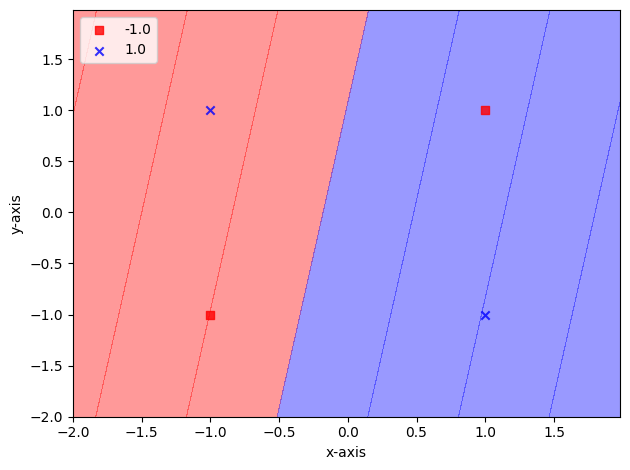

In [24]:
X = torch.tensor([[-1,-1],[-1,1], [1,-1], [1,1]], dtype=torch.float, requires_grad=False)

print("=========================== XOR Gate ============================")
y = torch.tensor([-1,1,1,-1], dtype=torch.float, requires_grad=False)
linear_train_and_visualize(X, y)

We can see that model fails to learn complex relation and model collapsed to a simple linear model. Just see the last picture and first picture of second exsercise question. All the boundary lines are linear.

# References and useful resources



1.   http://d2l.ai/chapter_multilayer-perceptrons/mlp.html
2.   [But what is a neural network? (3 Blue 1 Brown series)](https://www.youtube.com/watch?v=aircAruvnK)

